# Recommendation Engine Model

### Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
%time Music_Data=pd.read_csv(r"D:\Project\Recommendation_Engine\Data\data.csv")
Music_Data.head(5)

CPU times: total: 656 ms
Wall time: 1.35 s


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


### Data Understanding

In [3]:
Music_Data=Music_Data.drop(columns=["id","release_date"])

In [4]:
Music_Data["name"].nunique()

133638

In [5]:
Music_Data.drop_duplicates(subset=['name'],inplace=True)
Music_Data.index=range(0,133638)

In [6]:
Music_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133638 entries, 0 to 133637
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           133638 non-null  float64
 1   year              133638 non-null  int64  
 2   acousticness      133638 non-null  float64
 3   artists           133638 non-null  object 
 4   danceability      133638 non-null  float64
 5   duration_ms       133638 non-null  int64  
 6   energy            133638 non-null  float64
 7   explicit          133638 non-null  int64  
 8   instrumentalness  133638 non-null  float64
 9   key               133638 non-null  int64  
 10  liveness          133638 non-null  float64
 11  loudness          133638 non-null  float64
 12  mode              133638 non-null  int64  
 13  name              133638 non-null  object 
 14  popularity        133638 non-null  int64  
 15  speechiness       133638 non-null  float64
 16  tempo             13

In [7]:
Music_Data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,0.0380,101.665


## Clustering

In [8]:
Cluster_Data_first=Music_Data.copy()

In [9]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=150))])#, n_jobs=-1
X = Music_Data.select_dtypes(np.number)
cluster_pipeline.fit(X)
Cluster_Data_first['cluster_label'] = cluster_pipeline.predict(X)

In [10]:
Cluster_Data_first["name"]=Cluster_Data_first["name"].str.encode('ascii', 'ignore').str.decode('ascii')

In [47]:
Cluster_Data_first.to_csv(r'D:\Project\Recommendation_Engine\Cluster_Data.csv')

In [11]:
Cluster_Data=Cluster_Data_first.copy()

## 3-D Model with PCA Components

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=3)

In [14]:
ss=StandardScaler()
scaled_df=ss.fit_transform(Music_Data.drop(columns=["name","artists"]))

In [15]:
pd.DataFrame(scaled_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.797833,-2.086826,1.263856,-1.463117,4.579861,-1.011417,-0.318115,2.251068,1.361243,2.531308,-1.483799,0.647158,-1.210965,-0.397210,-1.166251
1,1.632728,-2.086826,0.602622,1.577546,-0.385812,-0.526746,-0.318115,-0.537971,0.508330,-0.281264,-0.155659,0.647158,-1.166293,1.721654,-1.817142
2,-1.873764,-2.086826,1.208313,-1.187205,2.050977,-1.179187,-0.318115,2.362248,-0.628887,-0.609862,-0.573620,0.647158,-1.166293,-0.412329,-0.210790
3,-1.396918,-2.086826,1.224182,-1.485640,-0.161091,-0.646050,-0.318115,-0.537883,-0.060278,0.949584,0.386528,0.647158,-1.255637,-0.403930,-0.543421
4,-1.062821,-2.086826,1.197733,-0.680428,-0.491359,-1.078525,-0.318115,-0.537965,-0.628887,0.103028,0.251198,0.647158,-1.300309,-0.389371,-0.492827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133633,-0.041550,1.682951,-0.793904,0.333127,-0.003992,-0.038347,3.143515,-0.537922,-1.481799,-0.570875,0.095916,0.647158,1.558687,0.842527,0.105942
133634,-1.705197,1.682951,1.242697,-2.048726,-0.744495,-1.769777,-0.318115,2.400367,0.508330,-0.543028,-4.082132,0.647158,1.737374,-0.347934,-1.494070
133635,0.763319,1.682951,-0.788614,1.003199,-0.613675,1.009287,-0.318115,-0.537971,0.508330,-0.609862,0.958383,0.647158,1.648031,-0.263381,0.686534
133636,0.395053,1.682951,-1.066332,0.535838,-0.151330,1.400752,-0.318115,-0.537944,-0.344583,0.264542,1.616642,-1.545219,2.005405,-0.149151,-0.817232


In [16]:
PCA_Values=pd.DataFrame(pca.fit_transform(scaled_df))
PCA_Values.columns=["PC1","PC2","PC3"]
PCA_Values

,PC1,PC2,PC3
0,4.184906,2.398125,1.733406
1,1.423674,-3.311150,-0.808777
2,3.751473,1.838503,0.402648
3,2.482959,0.412149,-0.198266
4,2.500788,-0.173952,-0.571684
...,...,...,...
133633,-2.224971,-0.586401,2.403354
133634,3.195076,2.853603,2.046149
133635,-2.965515,0.151575,-0.849498
133636,-3.302549,0.637690,0.304916


<function matplotlib.pyplot.show(close=None, block=None)>

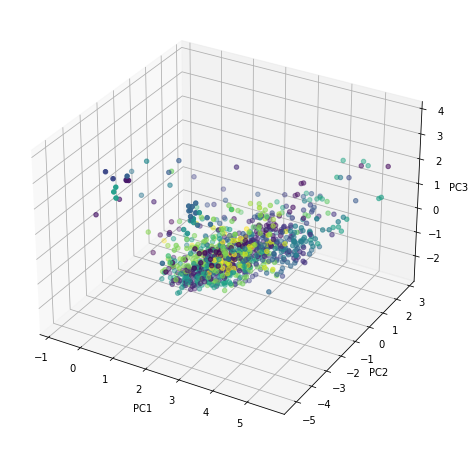

In [17]:
True_Values=Cluster_Data['cluster_label'].head(1000)

x=PCA_Values["PC1"].head(1000)
y=PCA_Values["PC2"].head(1000)
z=PCA_Values["PC3"].head(1000)

plt.figure(figsize=(8,8))
axes = plt.axes(projection='3d')
axes.scatter3D(x,y,z,c=True_Values)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')
plt.show

## Finding optimum number of clusters

In [18]:
# wcss = []

# for i in range(1,51):
#     kmeans = KMeans(n_clusters=i,random_state=12)
#     kmeans.fit(scaled_df)
#     wcss.append(kmeans.inertia_)

## Elbow Method

In [19]:
# plt.plot(range(1,51),wcss)
# plt.title('ELBOW METHOD')
# plt.ylabel('WCSS')
# plt.show()

In [20]:
scaled_df=pd.DataFrame(scaled_df)
scaled_df["cluster_label"]=Cluster_Data["cluster_label"]
scaled_df.index=Cluster_Data_first["name"]
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster_label
name,,,,,,,,,,,,,,,,
"Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve",-1.797833,-2.086826,1.263856,-1.463117,4.579861,-1.011417,-0.318115,2.251068,1.361243,2.531308,-1.483799,0.647158,-1.210965,-0.397210,-1.166251,88
Clancy Lowered the Boom,1.632728,-2.086826,0.602622,1.577546,-0.385812,-0.526746,-0.318115,-0.537971,0.508330,-0.281264,-0.155659,0.647158,-1.166293,1.721654,-1.817142,3
Gati Bali,-1.873764,-2.086826,1.208313,-1.187205,2.050977,-1.179187,-0.318115,2.362248,-0.628887,-0.609862,-0.573620,0.647158,-1.166293,-0.412329,-0.210790,42
Danny Boy,-1.396918,-2.086826,1.224182,-1.485640,-0.161091,-0.646050,-0.318115,-0.537883,-0.060278,0.949584,0.386528,0.647158,-1.255637,-0.403930,-0.543421,20
When Irish Eyes Are Smiling,-1.062821,-2.086826,1.197733,-0.680428,-0.491359,-1.078525,-0.318115,-0.537965,-0.628887,0.103028,0.251198,0.647158,-1.300309,-0.389371,-0.492827,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NASTY GIRL / ON CAMERA,-0.041550,1.682951,-0.793904,0.333127,-0.003992,-0.038347,3.143515,-0.537922,-1.481799,-0.570875,0.095916,0.647158,1.558687,0.842527,0.105942,131
Med slutna gon,-1.705197,1.682951,1.242697,-2.048726,-0.744495,-1.769777,-0.318115,2.400367,0.508330,-0.543028,-4.082132,0.647158,1.737374,-0.347934,-1.494070,53
Halloweenie III: Seven Days,0.763319,1.682951,-0.788614,1.003199,-0.613675,1.009287,-0.318115,-0.537971,0.508330,-0.609862,0.958383,0.647158,1.648031,-0.263381,0.686534,120


## Error for space allocation

In [21]:
# from scipy.spatial.distance import pdist, squareform
# distances = squareform(pdist(PCA_Values.values, metric='euclidean'))

## Recommendation Engine

In [22]:
def get_reccomendation(song_name):
    
    if len(list(Cluster_Data_first[Cluster_Data_first['name']==song_name].index.values))==0:
        print('Sorry!! Song not available')
        
    else:
        index = int(Cluster_Data_first[Cluster_Data_first['name']==song_name].index.values)
        df = scaled_df[scaled_df['cluster_label']==scaled_df['cluster_label'][index]]
        
        distances = pd.DataFrame(data=pairwise_distances(X=df ,Y=None,metric='euclidean')).round(2)
        distances.index   = df.index # movie_data['userId'].unique()
        distances.columns = df.index
        
        rec_df = pd.DataFrame(distances[song_name])  #.sort_values(by=distances[name], ascending = True, axis=0)
        rec = rec_df.sort_values(song_name, axis = 0, ascending = True, inplace = False, na_position ='last')
        
        return pd.DataFrame(rec.iloc[1:12].index.values, columns=['Songs'])

## Recommendation with Name of song as input

In [48]:
%time get_reccomendation("All About U")

CPU times: total: 844 ms
Wall time: 262 ms


,Songs
0,This Is How We Do
1,I Wonder If Heaven Got A Ghetto - Hip-Hop Version
2,Connected For Life
3,We Luv Deez Hoez (feat. Backbone & Big Gipp)
4,I Know What Girls Like
5,"No Endz, No Skinz"
6,Another (feat. Lil' Kim) - 2014 Remaster
7,Slacker
8,What Ya Want
9,4 My People (feat. Eve)


## Recommendation based on Artist

### Data Understanding

In [24]:
Artist_Rec_Data=Cluster_Data_first.copy()

In [3]:
Artist_Data=pd.read_csv(r"D:\Project\Recommendation_Engine\Data\data_by_artist.csv")

In [4]:
Artist_Data=Artist_Data.iloc[0:28300]

In [5]:
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("[", "")
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("]", "")
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("'", "")
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("\'", "")
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("\(", "")
Artist_Rec_Data["artists"]=Artist_Rec_Data["artists"].str.replace("\)", "")

NameError: name 'Artist_Rec_Data' is not defined

In [6]:
Artist_Data_scaled=pd.DataFrame(ss.fit_transform(Artist_Data.drop(columns=["artists"])))
Artist_Data_scaled.index=Artist_Data["artists"]
Artist_Data_scaled.head()

NameError: name 'ss' is not defined

In [29]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=30))])#, n_jobs=-1
X = Artist_Data.select_dtypes(np.number)
cluster_pipeline.fit(X)
Artist_Data['cluster_label'] = cluster_pipeline.predict(X)

In [50]:
Artist_Data.to_csv(r"D:\Project\Recommendation_Engine\Artist_Data.csv")

In [30]:
#distances = pd.DataFrame(data=pairwise_distances(X=Artist_Data_scaled ,Y=None,metric='euclidean')).round(2)

## Artist name as Input

In [31]:
def get_similar_Artist(artist_name):
    if len(list(Artist_Data[Artist_Data['artists']==artist_name].index.values))==0:
        print("Artist Not available in the Database")
    else:
        index = int(Artist_Data[Artist_Data['artists']==artist_name].index.values)
        df = Artist_Data[Artist_Data['cluster_label']==Artist_Data['cluster_label'][index]]
        
        artist_index=df["artists"]
        distances = pd.DataFrame(data=pairwise_distances(X=df.drop(columns=["artists"]) ,Y=None,metric='euclidean')).round(2)
        distances.index   = artist_index
        distances.columns = artist_index
        
        art_df = pd.DataFrame(distances[artist_name])
        art = art_df.sort_values(artist_name, axis = 0, ascending = True, inplace = False, na_position ='last')

    return pd.DataFrame(art.head(5).index)

In [32]:
get_similar_Artist('"Cats" 1983 Broadway Cast')

,artists
0,"""Cats"" 1983 Broadway Cast"
1,Richard Reynoso
2,Serú Girán
3,Karen Holness
4,Radical Face


In [33]:
def artist(song_name):
    if len(list(Artist_Rec_Data[Artist_Rec_Data['name']==song_name].index.values))==0:
        print('Sorry!! Song not available')
        
    else:
        index = int(Artist_Rec_Data[Artist_Rec_Data['name']==song_name].index.values)
        Ar = Artist_Rec_Data.iloc[index,3]
        Artists = Ar.split(",")
            
        return (Artists)

In [34]:
artist("A Midsummer Night's Dream, Op. 61: Scherzo")

['Felix Mendelssohn', ' Arturo Toscanini']

In [35]:
artist("All About U")

['2Pac', ' Snoop Dogg', ' Nate Dogg', ' Dru Down']

In [36]:
artist("Rapunzel")

['Dave Matthews Band']

## Song Name as Input

In [37]:
def sim_Artist(song_name):
    
    if len(list(Cluster_Data_first[Cluster_Data_first['name']==song_name].index.values))==0:
        print('Sorry!! Song not available')
        
    else:
        index = int(Artist_Rec_Data[Artist_Rec_Data['name']==song_name].index.values)
        Ar = Artist_Rec_Data.iloc[index,3]
        artist_name = Ar.split(",")
        
        if len(artist_name)==1:
            index = int(Artist_Data[Artist_Data['artists']==artist_name[0]].index.values)
            df = Artist_Data[Artist_Data['cluster_label']==Artist_Data['cluster_label'][index]]
        
            artist_index=df["artists"]
            distances = pd.DataFrame(data=pairwise_distances(X=df.drop(columns=["artists"]) ,Y=None,metric='euclidean')).round(2)
            distances.index   = artist_index
            distances.columns = artist_index
        
            art_df = pd.DataFrame(distances[artist_name])
            art = art_df.sort_values(artist_name, axis = 0, ascending = True, inplace = False, na_position ='last')

            return pd.DataFrame(art.head(5).index)
        
        elif len(artist_name)==2:
            index = int(Artist_Data[Artist_Data['artists']==artist_name[0]].index.values)
            df = Artist_Data[Artist_Data['cluster_label']==Artist_Data['cluster_label'][index]]
        
            artist_index=df["artists"]
            distances = pd.DataFrame(data=pairwise_distances(X=df.drop(columns=["artists"]) ,Y=None,metric='euclidean')).round(2)
            distances.index   = artist_index
            distances.columns = artist_index
        
            art_df = pd.DataFrame(distances[artist_name])
            art = art_df.sort_values(artist_name, axis = 0, ascending = True, inplace = False, na_position ='last')
            
            Merged_Df=art.head(3)
            
            index = int(Artist_Data[Artist_Data['artists']==artist_name[1]].index.values)
            df = Artist_Data[Artist_Data['cluster_label']==Artist_Data['cluster_label'][index]]
        
            artist_index=df["artists"]
            distances = pd.DataFrame(data=pairwise_distances(X=df.drop(columns=["artists"]) ,Y=None,metric='euclidean')).round(2)
            distances.index   = artist_index
            distances.columns = artist_index
        
            art_df = pd.DataFrame(distances[artist_name])
            art = art_df.sort_values(artist_name, axis = 0, ascending = True, inplace = False, na_position ='last')
            
            Merged_Df=pd.concat(Merged_Df,art.head(2),axis=0)
            
            return Merged_Df
        
        else:
            
            return pd.DataFrame(artist_name,columns=["artists"])
               

In [38]:
sim_Artist("All About You")

,artists
0,McFly
1,Sabrina Carpenter
2,Fugazi
3,The Struts
4,The Cramps


In [39]:
def find_song(artist):
    a = 0
    b = 0
    ar_names = []
    ar_song = []
    pop = []
    for i in Artist_Rec_Data["artists"]:
        if artist.lower() in Artist_Rec_Data["artists"][a].lower():
            ar_names.append(Artist_Rec_Data["artists"][a]) 
            ar_song.append(Artist_Rec_Data["name"][a])
            pop.append(Artist_Rec_Data["popularity"][a])
            df = pd.DataFrame()
            df['Songs']=ar_song
            df['Artists']=ar_names
            df['Popularity']=pop
            df.sort_values('Popularity', axis=0, ascending=False, inplace=True)
            b+=1
        a+=1
    if b == 0:
        print("Nothing found. Please try something else :)")
    return df.drop_duplicates()

In [40]:
def similar_Song_Artist(song_name):
    
    if len(list(Cluster_Data_first[Cluster_Data_first['name']==song_name].index.values))==0:
        print('Sorry!! Song not available')
        
    else:
        index = int(Artist_Rec_Data[Artist_Rec_Data['name']==song_name].index.values)
        Ar = Artist_Rec_Data.iloc[index,3]
        artist_name = Ar.split(",")
        
        if len(artist_name)==1:
            index = int(Artist_Data[Artist_Data['artists']==artist_name[0]].index.values)
            df = Artist_Data[Artist_Data['cluster_label']==Artist_Data['cluster_label'][index]]
        
            artist_index=df["artists"]
            distances = pd.DataFrame(data=pairwise_distances(X=df.drop(columns=["artists"]) ,Y=None,metric='euclidean')).round(2)
            distances.index   = artist_index
            distances.columns = artist_index
        
            art_df = pd.DataFrame(distances[artist_name])
            art = art_df.sort_values(artist_name, axis = 0, ascending = True, inplace = False, na_position ='last')

            Axe=pd.DataFrame(art.head(5).index)
        
        elif len(artist_name)==2:
            index = int(Artist_Data[Artist_Data['artists']==artist_name[0]].index.values)
            df = Artist_Data[Artist_Data['cluster_label']==Artist_Data['cluster_label'][index]]
        
            artist_index=df["artists"]
            distances = pd.DataFrame(data=pairwise_distances(X=df.drop(columns=["artists"]) ,Y=None,metric='euclidean')).round(2)
            distances.index   = artist_index
            distances.columns = artist_index
        
            art_df = pd.DataFrame(distances[artist_name])
            art = art_df.sort_values(artist_name, axis = 0, ascending = True, inplace = False, na_position ='last')
            
            Merged_Df=art.head(3)
            
            index = int(Artist_Data[Artist_Data['artists']==artist_name[1]].index.values)
            df = Artist_Data[Artist_Data['cluster_label']==Artist_Data['cluster_label'][index]]
        
            artist_index=df["artists"]
            distances = pd.DataFrame(data=pairwise_distances(X=df.drop(columns=["artists"]) ,Y=None,metric='euclidean')).round(2)
            distances.index   = artist_index
            distances.columns = artist_index
        
            art_df = pd.DataFrame(distances[artist_name])
            art = art_df.sort_values(artist_name, axis = 0, ascending = True, inplace = False, na_position ='last')
            
            Merged_Df=pd.concat(Merged_Df,art.head(2),axis=0)
            
            Axe= Merged_Df
        
        else:
            
            Axe= pd.DataFrame(artist_name)
            
        ar_names = []
        ar_song = []
        pop = []
        
        for j in Axe["artists"]:
            a = 0
            b = 0
            for i in Artist_Rec_Data["artists"]:
                if j.lower() in Artist_Rec_Data["artists"][a].lower():
                    ar_names.append(Artist_Rec_Data["artists"][a]) 
                    ar_song.append(Artist_Rec_Data["name"][a])
                    pop.append(Artist_Rec_Data["popularity"][a])
                    df = pd.DataFrame()
                    df['Songs']=ar_song
                    df['Artists']=ar_names
                    df['Popularity']=pop
                    df.sort_values('Popularity', axis=0, ascending=False, inplace=True)
                    b+=1
                a+=1
            if b == 0:
                print("Nothing found. Please try something else :)")
            Out=df.drop(columns=["Popularity"])
            df.drop_duplicates(inplace=True)
        return pd.DataFrame(Out)

In [41]:
similar_Song_Artist("Rapunzel")

Nothing found. Please try something else :)


,Songs,Artists
3,Crash into Me,Dave Matthews Band
60,Raise a Hallelujah (Live),"Bethel Music, Jonathan David Helser, Melissa H..."
61,Goodness of God (Live),"Bethel Music, Jenn Johnson"
59,King of My Heart - Live,"Bethel Music, Steffany Gretzinger"
69,What A Beautiful Name,Hillsong Worship
...,...,...
52,The Song That Jane Likes - Acoustic Version,Dave Matthews Band
102,I Am Persuaded,Fred Hammond
56,"Seek Up - Live at Red Rocks Amphitheatre, Morr...",Dave Matthews Band
57,Spoon,Dave Matthews Band


In [42]:
similar_Song_Artist("All About You")

,Songs,Artists
7,Let Me Move You - From the Netflix film Work It,Sabrina Carpenter
2,Sue Me,Sabrina Carpenter
5,Looking at Me,Sabrina Carpenter
9,WOW (feat. Sabrina Carpenter) - Remix,"Zara Larsson, Sabrina Carpenter"
3,Thumbs,Sabrina Carpenter
...,...,...
77,Don't Eat Stuff Off The Sidewalk,The Cramps
84,The Natives Are Restless,The Cramps
82,Under The Wires,The Cramps
83,Beautiful Gardens,The Cramps


In [43]:
similar_Song_Artist("La Vipre")

Nothing found. Please try something else :)
Nothing found. Please try something else :)


,Songs,Artists
0,La Vipre,Georgel
1,An Imoun Andras,Katina Xomatianou
2,"Devuni Mahima - Raga - Mand (From ""Kanakatara"")",P. Suri Babu


In [44]:
def Final_recommendations(song_name):
    a=get_reccomendation(song_name)
    list_a=[]
    for i in a["Songs"]:
        list_a.append(artist(i))
    a["Artists"]=list_a
    b=similar_Song_Artist(song_name)
    Final_Df=pd.concat([a,b], axis=0)
    
    return pd.DataFrame(Final_Df.sample(10))

In [45]:
Final_recommendations("Shape of You")

,Songs,Artists
41,Gold Rush - Deluxe Edition,Ed Sheeran
67,Magic Rose,Joe Bataan
24,Perfect Duet (Ed Sheeran & Beyonc),"Ed Sheeran, Beyoncé"
39,Little Bird - Deluxe Edition,Ed Sheeran
78,Giving It Up For Your Love,Delbert McClinton
60,If I Were A King,Joe Bataan
45,Those Kinda Nights (feat. Ed Sheeran),"Eminem, Ed Sheeran"
3,Everything Has Changed,"Taylor Swift, Ed Sheeran"
47,BLOW (with Chris Stapleton & Bruno Mars),"Ed Sheeran, Chris Stapleton, Bruno Mars"
79,I've Got Dreams To Remember,Delbert McClinton


# END !!!